# Clase 4
En esta clase vamos a aplicar los métodos K-nn y SVM; esta vez vamos a aplicar los métodos en un corpus de imágenes.

## Primero importamos las librerías que vamos a utilizar.

In [1]:
%pylab inline
import IPython
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print('IPython version:', IPython.__version__)
print('numpy version:', np.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

Populating the interactive namespace from numpy and matplotlib
IPython version: 5.1.0
numpy version: 1.13.1
scikit-learn version: 0.19.0
matplotlib version: 2.0.2


## Importación del corpus y análisis de datos.
Esta vez, vamos a usar un corpus llamado Olivetti Faces.
Scikit ya permite descargarlo, lo que hace fácil su procesamiento y uso.

In [2]:
from sklearn.datasets import fetch_olivetti_faces

# fetch the faces data
faces = fetch_olivetti_faces()

print(faces.DESCR)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/Bruno/scikit_learn_data
Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [3]:
faces.images[0]

array([[ 0.30991736,  0.36776859,  0.41735536, ...,  0.37190083,
         0.33057851,  0.30578512],
       [ 0.3429752 ,  0.40495867,  0.43801653, ...,  0.37190083,
         0.33884299,  0.3140496 ],
       [ 0.3429752 ,  0.41735536,  0.45041323, ...,  0.38016528,
         0.33884299,  0.29752067],
       ..., 
       [ 0.21487603,  0.20661157,  0.22314049, ...,  0.15289256,
         0.16528925,  0.17355372],
       [ 0.20247933,  0.2107438 ,  0.2107438 , ...,  0.14876033,
         0.16115703,  0.16528925],
       [ 0.20247933,  0.20661157,  0.20247933, ...,  0.15289256,
         0.16115703,  0.1570248 ]], dtype=float32)

La función 'print_faces' nos permitirá visualizar las caras del dataset.

In [4]:
def print_faces(images, target, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap='gray')
        
        # label the image with the target value
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))

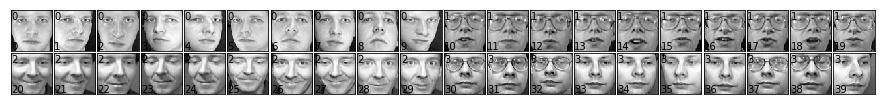

In [5]:
print_faces(faces.images, faces.target, 40)

## Clasificador SVM
En esta sección vamos a implementar el clasificador SVM. Al igual que la clase anterior, probamos varias variantes y nos quedamos con el que de mejor resultado en Cross-Validation.  
Esta vez vamos a utilizar Grid Search

Como siempre, dividimos en entrenamiento y testeo.

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=42)

print('X_train shape: ' + str(X_train.shape))
print('X_test shape: '  + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: '  + str(y_test.shape))

X_train shape: (320, 4096)
X_test shape: (80, 4096)
y_train shape: (320,)
y_test shape: (80,)


Ahora establecemos los parámetros con los que vamos a probar. Tiene que ser un array de diccionarios.

In [18]:
param_grid = [{'C':[1, 10, 100, 1000], 'gamma':['auto', 0.001, 0.0001], 'kernel':['rbf']},
              {'C':[1, 10, 100, 1000], 'kernel':['linear']}]

Buscamos los mejores parámetros usando gridsearch.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC()
grid = GridSearchCV(svc, param_grid)

Nos quedamos con el mejor y entrenamos

In [23]:
svm = grid.fit(X_train, y_train)

Otra posibilidad es utilizar randomized grid search. Es lo mismo pero en vez de especificar valores, especificamos distribuciones de probabilidad.

Sugerencia: usar la función expon del módulo stats de scipy (una variable aleatoria)

In [28]:
from scipy.stats import expon
random_param_grid = {'C':expon, 'gamma':expon, 'kernel':['rbf','linear']}

In [29]:
from sklearn.model_selection import RandomizedSearchCV
random_svc = SVC()
random_grid = RandomizedSearchCV(random_svc, random_param_grid)

Nos quedamos con el mejor.

In [30]:
random_svm = random_grid.fit(X_train, y_train)

## Clasificador K-nn
Como en el ejemplo anterior, definimos los parámetros y nos quedamos con los mejores.

In [31]:
param_grid_knn = [{'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15],'weights':['uniform','distance'], 
                   'metric':['euclidean','manhattan','chebyshev']}]


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_base = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_base, param_grid_knn)

Nos quedamos con el mejor y entrenamos.

In [33]:
knn = knn_grid.fit(X_train, y_train)

### Evaluación
Igual que en la clase anterior, evaluamos la performance de nuestros clasificadores.

In [84]:
from sklearn import metrics
def measure_performance(X,y,clf):
    print('Accuracy: ' + str(clf.score(X,y)))
        

In [37]:
measure_performance(X_test, y_test, knn)

0.95


In [39]:
measure_performance(X_test, y_test, svm)

0.9875


In [40]:
measure_performance(X_test, y_test, random_svm)

0.975


Observar que en este ejemplo es dificil sacar buenas conclusiones sobre cada clase en particular, ya que cada una tiene pocos ejemplos.

## Tarea extra
Construir un predictor que detecte si una persona del dataset tiene lentes o no. Evaluar su performance y concluir si podemos decir que detecta bien o no.

In [102]:
# Índice de las personas que usan lentes.
glasses = [
	(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
	(69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
	(164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
	(194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
	(330, 339), (358, 359), (360, 369)
]


glasses_target = np.zeros_like(faces.target)
for i,j in glasses:
    glasses_target[i:j+1] = 1

X_train, X_test, y_train, y_test = train_test_split(faces.data, glasses_target, test_size=0.2, random_state=42)

print('X_train shape: ' + str(X_train.shape))
print('X_test shape: '  + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: '  + str(y_test.shape))

X_train shape: (320, 4096)
X_test shape: (80, 4096)
y_train shape: (320,)
y_test shape: (80,)


In [103]:
param_grid = [{'C':[1, 10, 100, 1000], 'gamma':['auto', 0.001, 0.0001], 'kernel':['rbf']},
              {'C':[1, 10, 100, 1000], 'kernel':['linear']}]

svc = SVC()
grid = GridSearchCV(svc, param_grid)
svm = grid.fit(X_train, y_train)
measure_performance(X_test, y_test, svm)

Accuracy: 0.975


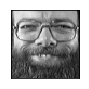

In [104]:
fig = plt.figure(figsize=(30,30))
p = fig.add_subplot(20, 20, 1, xticks=[], yticks=[])
p.imshow(faces.images[361], cmap='gray')